In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 3: Google Playstore Apps Dataset
**Given an Excel data file as represented by the sample file GooglePlaystore.xlsx  Download GooglePlaystore.xlsx (10K records), load it into a Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.**

In [280]:
google_df = pd.read_excel("GooglePlaystore.xlsx")
google_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres         Last Updated         Current Ver  \
0               Art & Design  2018-01-07 00:00:00               1.0.0   
1  Art & Design;Pretend Play  2018-01-15 00:00:00               2.0.0   
2               Art & Design  2018-08-01 00:00:00               1.2.4   
3               Art & Design  2018-06-08 00:00:00  Varies with device   
4    Art & Design;Creativity  2018-06-20 00:00:00                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## Preprocessing (28 pts)

**1.[3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.**

In [281]:
google_df.shape

(10841, 13)

In [282]:
google_df = google_df[pd.to_numeric(google_df['Reviews'], errors='coerce').notnull()]
google_df.shape

(10840, 13)

**2.[4 pts] Remove rows where any of the columns has the value "Varies with device".**

In [283]:
for col in google_df.columns:
    google_df = google_df[~google_df[col].isin(["Varies with device"])]

In [284]:
google_df.shape

(9059, 13)

**3.[5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".**

In [285]:
def update_values(x):
    decimal = False
    new = ""
    if type(x) == str:       
        for i in x:
            if i == "." and decimal == False:
                decimal = True
                new = new + i
            elif i == " ":
                break
            elif (decimal and i == "."):
                break
            else:
                try:
                    integer = int(i)
                    new = new + i  
                except:
                    break
    else:
        new = x
        
    return float(new)


In [286]:
google_df["Android Ver"] = google_df["Android Ver"].apply(update_values)
google_df.tail()

App  Category  Rating Reviews  Size  \
10834                     FR Calculator    FAMILY     4.0       7  2.6M   
10835                          FR Forms  BUSINESS     NaN       0  9.6M   
10836                  Sya9a Maroc - FR    FAMILY     4.5      38   53M   
10837  Fr. Mike Schmitz Audio Teachings    FAMILY     5.0       4  3.6M   
10838            Parkinson Exercices FR   MEDICAL     NaN       3  9.5M   

      Installs  Type Price Content Rating     Genres         Last Updated  \
10834     500+  Free     0       Everyone  Education  2017-06-18 00:00:00   
10835      10+  Free     0       Everyone   Business  2016-09-29 00:00:00   
10836   5,000+  Free     0       Everyone  Education  2017-07-25 00:00:00   
10837     100+  Free     0       Everyone  Education  2018-07-06 00:00:00   
10838   1,000+  Free     0       Everyone    Medical  2017-01-20 00:00:00   

      Current Ver  Android Ver  
10834       1.0.0          4.1  
10835       1.1.5          4.0  
10836        1.48          4.1  
10837           1          4.1  
10838           1          2.2

**4.[5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.**

In [287]:
google_df["Installs"].replace('[,+]','', regex=True, inplace=True)

In [288]:
google_df["Installs"] = google_df["Installs"].astype(int)
google_df["Reviews"] = google_df["Reviews"].astype(int)
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver       float64
dtype: object

**5.[5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.**

In [289]:
google_df = google_df.drop(google_df[(google_df['Reviews'] < 100) & (google_df['Installs'] < 50000) & google_df['Rating'].isnull()].index)
means = google_df.groupby('Category')['Rating'].transform('mean')
google_df['Rating'].fillna(means, inplace=True)
# google_df['Rating'].isnull().sum()
google_df.shape

(7685, 13)

**6.[6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.**

In [290]:
def transform_size(x):
    s = x[-1]
    if s == 'M':
        return int(float(x[:-1]) * 1000000)
    elif s == 'K':
        return int(float(x[:-1]) * 1000)

In [291]:
google_df["Size"] = google_df["Size"].apply(transform_size)
google_df["Size"] = google_df['Size'].fillna(-1)
google_df["Size"] = google_df['Size'].astype('Int64')
google_df["Size"] = google_df["Size"].replace(-1,np.nan)
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                Int64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver       float64
dtype: object

In [292]:
google_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   

   Reviews      Size  Installs  Type Price Content Rating  \
0      159  19000000     10000  Free     0       Everyone   
1      967  14000000    500000  Free     0       Everyone   
2    87510   8700000   5000000  Free     0       Everyone   
4      967   2800000    100000  Free     0       Everyone   
5      167   5600000     50000  Free     0       Everyone   

                      Genres         Last Updated Current Ver  Android Ver  
0               Art & Design  2018-01-07 00:00:00       1.0.0          4.0  
1  Art & Design;Pretend Play  2018-01-15 00:00:00       2.0.0          4.0  
2               Art & Design  2018-08-01 00:00:00       1.2.4          4.0  
4    Art & Design;Creativity  2018-06-20 00:00:00         1.1          4.4  
5               Art & Design  2017-03-26 00:00:00           1          2.3

In [293]:
# google_df.to_csv("TransformedGooglePlaystore.csv")

# ANALYSIS (19 pts)

**1.[4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.**

In [294]:
google_df.groupby('Category')['Rating'].describe()

count      mean       std  min    25%       50%    75%  \
Category                                                                       
ART_AND_DESIGN         59.0  4.358621  0.365322  3.2  4.100  4.400000  4.700   
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.250000  4.500   
BEAUTY                 40.0  4.291892  0.356175  3.1  4.075  4.300000  4.525   
BOOKS_AND_REFERENCE   147.0  4.320139  0.453084  2.7  4.100  4.400000  4.600   
BUSINESS              246.0  4.119184  0.662586  1.0  3.825  4.300000  4.500   
COMICS                 49.0  4.154167  0.550363  2.8  3.800  4.400000  4.600   
COMMUNICATION         210.0  4.100957  0.502624  1.0  3.900  4.200000  4.400   
DATING                174.0  3.957803  0.664204  1.0  3.600  4.100000  4.400   
EDUCATION             110.0  4.392661  0.254395  3.5  4.300  4.400000  4.600   
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.200000  4.300   
EVENTS                 36.0  4.474286  0.340036  3.7  4.300  4.500000  4.725   
FAMILY               1611.0  4.189608  0.514460  1.0  4.000  4.300000  4.500   
FINANCE               263.0  4.114068  0.683553  1.0  3.900  4.300000  4.500   
FOOD_AND_DRINK         86.0  4.097619  0.573529  1.7  3.800  4.200000  4.500   
GAME                  956.0  4.268586  0.378420  1.0  4.100  4.300000  4.500   
HEALTH_AND_FITNESS    220.0  4.215455  0.696722  1.4  4.000  4.500000  4.600   
HOUSE_AND_HOME         58.0  4.162500  0.376299  2.8  4.000  4.200000  4.475   
LIBRARIES_AND_DEMO     68.0  4.203226  0.350253  3.1  4.000  4.203226  4.400   
LIFESTYLE             280.0  4.093165  0.714612  1.5  3.800  4.200000  4.600   
MAPS_AND_NAVIGATION    94.0  4.004255  0.556663  1.9  3.700  4.200000  4.400   
MEDICAL               321.0  4.180374  0.676356  1.0  3.900  4.300000  4.600   
NEWS_AND_MAGAZINES    171.0  4.141667  0.586858  1.7  3.950  4.300000  4.500   
PARENTING              48.0  4.347727  0.397058  3.1  4.100  4.400000  4.625   
PERSONALIZATION       277.0  4.322022  0.368190  2.5  4.100  4.400000  4.600   
PHOTOGRAPHY           234.0  4.145726  0.512675  2.0  4.000  4.300000  4.500   
PRODUCTIVITY          232.0  4.140693  0.581525  1.0  4.000  4.200000  4.500   
SHOPPING              178.0  4.226404  0.439606  1.6  4.100  4.300000  4.500   
SOCIAL                170.0  4.257059  0.484289  1.9  4.100  4.300000  4.600   
SPORTS                248.0  4.204858  0.466767  1.5  4.000  4.300000  4.500   
TOOLS                 633.0  4.010618  0.638232  1.0  3.800  4.200000  4.400   
TRAVEL_AND_LOCAL      155.0  4.029677  0.556680  2.2  3.700  4.200000  4.400   
VIDEO_PLAYERS         114.0  4.029204  0.593726  1.8  3.725  4.200000  4.400   
WEATHER                49.0  4.242857  0.349404  3.3  4.000  4.300000  4.500   

                     max  
Category                  
ART_AND_DESIGN       5.0  
AUTO_AND_VEHICLES    4.9  
BEAUTY               4.9  
BOOKS_AND_REFERENCE  5.0  
BUSINESS             5.0  
COMICS               5.0  
COMMUNICATION        5.0  
DATING               5.0  
EDUCATION            4.9  
ENTERTAINMENT        4.7  
EVENTS               5.0  
FAMILY               5.0  
FINANCE              5.0  
FOOD_AND_DRINK       5.0  
GAME                 5.0  
HEALTH_AND_FITNESS   5.0  
HOUSE_AND_HOME       4.8  
LIBRARIES_AND_DEMO   5.0  
LIFESTYLE            5.0  
MAPS_AND_NAVIGATION  4.9  
MEDICAL              5.0  
NEWS_AND_MAGAZINES   5.0  
PARENTING            5.0  
PERSONALIZATION      5.0  
PHOTOGRAPHY          5.0  
PRODUCTIVITY         5.0  
SHOPPING             5.0  
SOCIAL               5.0  
SPORTS               5.0  
TOOLS                5.0  
TRAVEL_AND_LOCAL     5.0  
VIDEO_PLAYERS        4.9  
WEATHER              4.8

**2.[11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:**

In [295]:
free_app = google_df.loc[google_df['Type'] == 'Free']
new_df = free_app.sort_values(['Rating','Category'],ascending = False).groupby('Category')[['Category','App','Rating']]

In [296]:
def create_df(name):
    new_df = free_app.sort_values([name, 'Category'],ascending=False).groupby('Category').head(3)[['Category', 'App', name]]
    return new_df.nlargest(3,name)
top_ratings = create_df('Rating')
top_installs = create_df('Installs')
top_reviews = create_df('Reviews')

In [297]:
#a.Rating
top_ratings
#b. Installs
top_installs
#c.Reviews
top_reviews

Category             App   Reviews
1879     GAME  Clash of Clans  44893888
1670     GAME  Clash of Clans  44891723
1704     GAME  Clash of Clans  44891723

**3.[4 pts] Find the average, maximum and minimum price of the paid applications.**

In [298]:
paid_apps = google_df[google_df['Type'] == 'Paid']

average = paid_apps['Price'].mean()
minimum = paid_apps['Price'].min()
maximum = paid_apps['Price'].max()
print('Average Price: ' + str(average))
print('Minimum Price: ' + str(minimum))
print('Maximum Price: ' + str(maximum))

google_df.shape

Average Price: 15.139163763066062
Minimum Price: 0.99
Maximum Price: 400


(7685, 13)

# Visualization (16 pts)

In [299]:
def make_list(x):
    return x.split(';')

google_df["Genres"] = google_df["Genres"].apply(make_list)

In [300]:
exploded_df = google_df.explode('Genres')
exploded = exploded_df['Genres'].value_counts()
exploded

Tools                      633
Education                  585
Entertainment              474
Action                     330
Medical                    321
Lifestyle                  280
Personalization            277
Sports                     264
Finance                    263
Business                   246
Photography                234
Productivity               232
Casual                     229
Health & Fitness           222
Communication              210
Simulation                 197
Arcade                     196
Shopping                   178
Dating                     174
News & Magazines           171
Social                     170
Travel & Local             155
Books & Reference          149
Puzzle                     133
Video Players & Editors    116
Action & Adventure         116
Role Playing               114
Strategy                    99
Educational                 97
Racing                      95
Maps & Navigation           94
Food & Drink                86
Pretend 

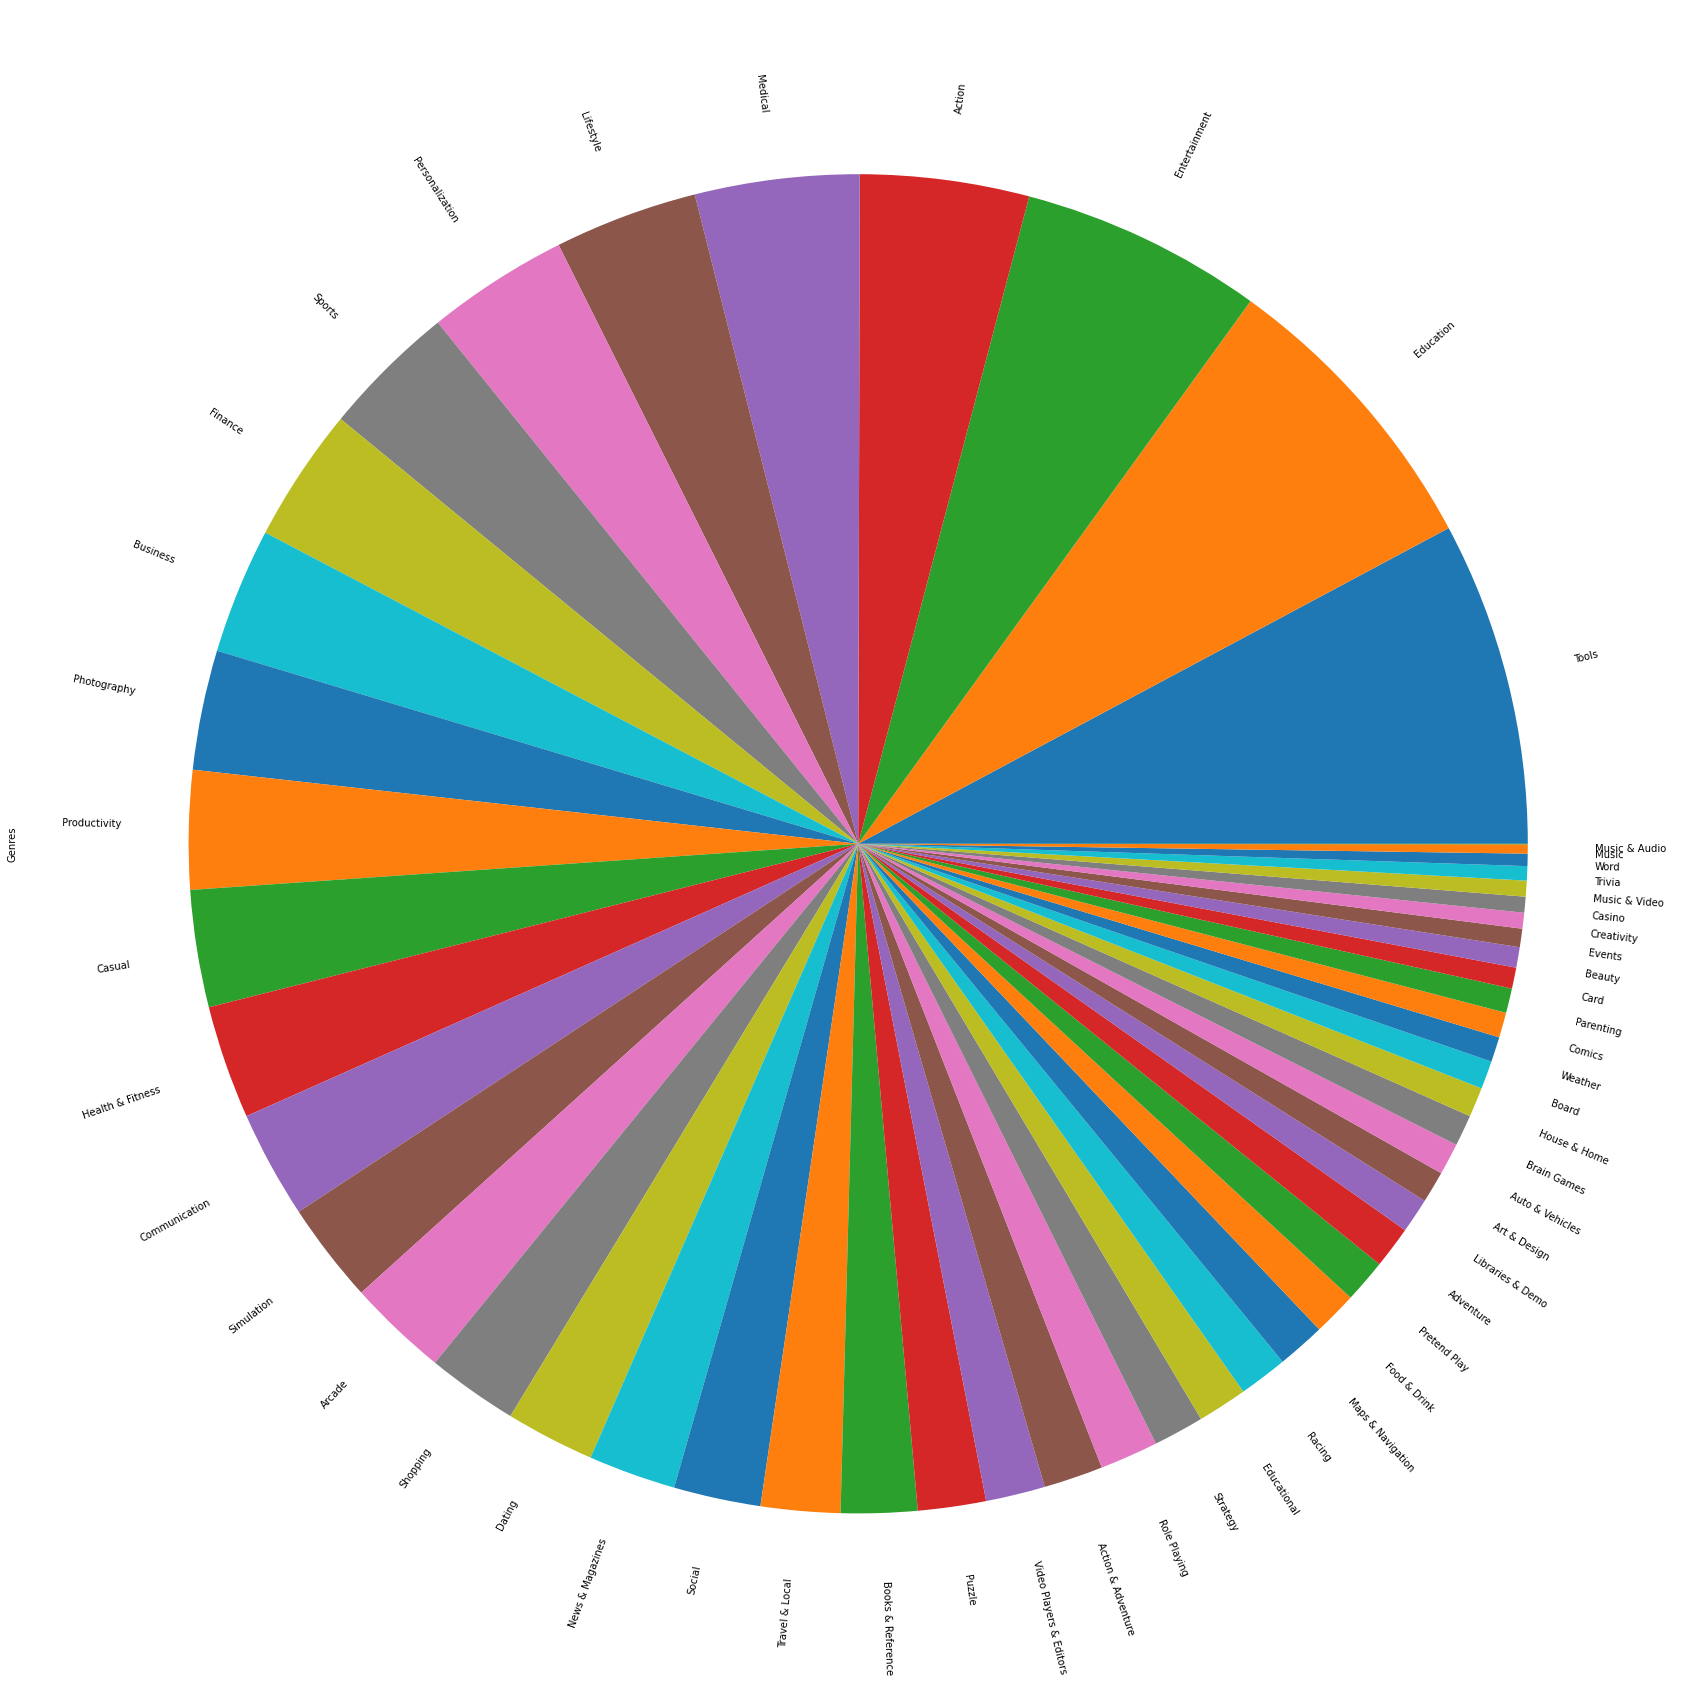

In [301]:
plot = exploded.plot.pie(figsize=(30, 60),rotatelabels=True)

In [302]:
business = google_df[(google_df.Category == 'BUSINESS')]
education = google_df[(google_df.Category == 'EDUCATION')]
cdf = pd.concat([business, education])    
#mdf = pd.melt(cdf, id_vars=['Category'], var_name=['Rating'])
business.head()

App  Category  Rating  \
190                               ADP Mobile Solutions  BUSINESS     4.3   
194             OfficeSuite : Free Office + PDF Editor  BUSINESS     4.3   
195                                       USPS MOBILE®  BUSINESS     3.9   
196                         Job Search by ZipRecruiter  BUSINESS     4.8   
197  Curriculum vitae App CV Builder Free Resume Maker  BUSINESS     4.5   

     Reviews      Size   Installs  Type Price Content Rating      Genres  \
190    85185  29000000    5000000  Free     0       Everyone  [Business]   
194  1002861  35000000  100000000  Free     0       Everyone  [Business]   
195    16589   9100000    1000000  Free     0       Everyone  [Business]   
196   148945  25000000    1000000  Free     0       Everyone  [Business]   
197     4458   3900000     500000  Free     0       Everyone  [Business]   

            Last Updated Current Ver  Android Ver  
190  2018-07-17 00:00:00       3.4.2          5.0  
194  2018-08-02 00:00:00   9.7.14188          4.1  
195  2018-06-14 00:00:00      4.9.10          4.0  
196  2018-07-19 00:00:00       5.2.8          5.0  
197  2018-07-08 00:00:00         3.3          4.1

In [303]:
frame = {'business':business['Rating'], 'education':business['Rating']}
new_df = pd.DataFrame(frame)
new_df

business  education
190         4.3        4.3
194         4.3        4.3
195         3.9        3.9
196         4.8        4.8
197         4.5        4.5
...         ...        ...
10624       2.9        2.9
10659       5.0        5.0
10706       4.6        4.6
10754       4.2        4.2
10810       4.8        4.8

[246 rows x 2 columns]

<AxesSubplot:>

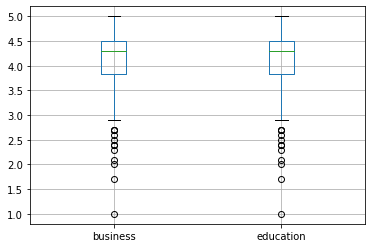

In [33]:
new_df.boxplot(column=["business", "education"])